<a href="https://colab.research.google.com/github/Aveefr/Mentor-led-Internship/blob/main/Uber/uber%2Btraffic_Avinash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TASK: Data Cleaning & Pre-processing

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Raw Data:
Read the collected data into pandas DataFrames.

In [134]:
df = pd.read_csv('Dataset_Uber Traffic.csv')

In [135]:
df.shape

(48120, 4)

In [136]:
df.head()

,DateTime,Junction,Vehicles,ID
0,01/11/15 0:00,1,15,20151101001
1,01/11/15 1:00,1,13,20151101011
2,01/11/15 2:00,1,10,20151101021
3,01/11/15 3:00,1,7,20151101031
4,01/11/15 4:00,1,9,20151101041


### Clean Data:
1. Handle missing values using methods like imputation or removal (df.fillna(), df.dropna()).
2. Remove duplicates (df.drop_duplicates()).
3. Correct data types (df.astype()).


In [137]:
# 1. Handle missing values using methods like imputation or removal (df.fillna(), df.dropna()).

df.isnull().mean()*100

DateTime    0.0
Junction    0.0
Vehicles    0.0
ID          0.0
dtype: float64

Observation: There are no missing values

In [138]:
#2. Remove duplicates (df.drop_duplicates()).

df.duplicated().sum()

0

Observation: There are no duplicate rows

In [139]:
# 3. Correct data types (df.astype()).

In [140]:
df.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [141]:
df['DateTime'] = df['DateTime'].astype('datetime64[ns]')

In [142]:
df.dtypes

DateTime    datetime64[ns]
Junction             int64
Vehicles             int64
ID                   int64
dtype: object

### Aggregate traffic data:
- Compile traffic data into hourly intervals for each junction.
- Ensure data includes relevant details such as vehicle counts.

In [143]:
df['Hour'] = df.DateTime.dt.hour
df['Date'] = df.DateTime.dt.date

In [144]:
df.head()

,DateTime,Junction,Vehicles,ID,Hour,Date
0,2015-01-11 00:00:00,1,15,20151101001,0,2015-01-11
1,2015-01-11 01:00:00,1,13,20151101011,1,2015-01-11
2,2015-01-11 02:00:00,1,10,20151101021,2,2015-01-11
3,2015-01-11 03:00:00,1,7,20151101031,3,2015-01-11
4,2015-01-11 04:00:00,1,9,20151101041,4,2015-01-11


In [145]:
df.Junction.value_counts()

Junction
1    14592
2    14592
3    14592
4     4344
Name: count, dtype: int64

In [146]:
df_grouped = df.groupby(['Junction', 'Date', 'Hour'])['Vehicles'].sum().reset_index()

In [147]:
df_grouped

,Junction,Date,Hour,Vehicles
0,1,2015-01-11,0,15
1,1,2015-01-11,1,13
2,1,2015-01-11,2,10
3,1,2015-01-11,3,7
4,1,2015-01-11,4,9
...,...,...,...,...
48115,4,2017-12-06,19,10
48116,4,2017-12-06,20,7
48117,4,2017-12-06,21,8
48118,4,2017-12-06,22,11


### Preprocess the data:

Normalize or standardize the data to facilitate comparison across different time periods and junctions.


In [148]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_grouped['Vehicles'] = scaler.fit_transform(df_grouped[['Vehicles']])

In [149]:
df_grouped

,Junction,Date,Hour,Vehicles
0,1,2015-01-11,0,-0.375489
1,1,2015-01-11,1,-0.471875
2,1,2015-01-11,2,-0.616454
3,1,2015-01-11,3,-0.761034
4,1,2015-01-11,4,-0.664648
...,...,...,...,...
48115,4,2017-12-06,19,-0.616454
48116,4,2017-12-06,20,-0.761034
48117,4,2017-12-06,21,-0.712841
48118,4,2017-12-06,22,-0.568261


## TASK : Feature Engineering and Selection


### Create new features from raw data:
1. Generate time-based features such as hour of the day, day of the week, and month.
2. Develop lag features by including traffic data from previous hours or days to capture temporal dependencies.
3. Create binary indicators for weekends and special events to account for their impact on traffic.

In [150]:
# 1. Generate time-based features such as hour of the day, day of the week, and month.

df_grouped['hour_of_the_day'] = df['DateTime'].dt.hour
df_grouped['day_of_the_week'] = df['DateTime'].dt.day_of_week
df_grouped['month'] = df['DateTime'].dt.month

In [151]:
df_grouped.head()

,Junction,Date,Hour,Vehicles,hour_of_the_day,day_of_the_week,month
0,1,2015-01-11,0,-0.375489,0,6,1
1,1,2015-01-11,1,-0.471875,1,6,1
2,1,2015-01-11,2,-0.616454,2,6,1
3,1,2015-01-11,3,-0.761034,3,6,1
4,1,2015-01-11,4,-0.664648,4,6,1


In [152]:
# 2. Develop lag features by including traffic data from previous hours or days to capture temporal dependencies.

df_grouped['PreviousHourVehicles'] = df_grouped.groupby('Junction')['Vehicles'].shift(1)

In [153]:
# 3. Create binary indicators for weekends and special events to account for their impact on traffic.

df_grouped['IsWeekend'] = df.DateTime.dt.day_of_week > 5
df_grouped

,Junction,Date,Hour,Vehicles,hour_of_the_day,day_of_the_week,month,PreviousHourVehicles,IsWeekend
0,1,2015-01-11,0,-0.375489,0,6,1,NaN,True
1,1,2015-01-11,1,-0.471875,1,6,1,-0.375489,True
2,1,2015-01-11,2,-0.616454,2,6,1,-0.471875,True
3,1,2015-01-11,3,-0.761034,3,6,1,-0.616454,True
4,1,2015-01-11,4,-0.664648,4,6,1,-0.761034,True
...,...,...,...,...,...,...,...,...,...
48115,4,2017-12-06,19,-0.616454,19,4,6,-0.664648,False
48116,4,2017-12-06,20,-0.761034,20,4,6,-0.616454,False
48117,4,2017-12-06,21,-0.712841,21,4,6,-0.761034,False
48118,4,2017-12-06,22,-0.568261,22,4,6,-0.712841,False


### Evaluate feature importance:
1. Use statistical methods and machine learning techniques (e.g., correlation analysis, feature importance from tree-based models) to assess the relevance of each feature.
2. Select the most influential features for model training to improve efficiency and performance.

In [154]:
final_df = df_grouped.drop(['Hour', 'Date'], axis=1)

In [155]:
# Correlation Matrix
correlation_matrix = final_df.corr()

print(correlation_matrix['Vehicles'].sort_values(ascending=False))

Vehicles                1.000000
PreviousHourVehicles    0.968447
hour_of_the_day         0.219938
month                   0.029378
IsWeekend              -0.062641
day_of_the_week        -0.070267
Junction               -0.613787
Name: Vehicles, dtype: float64


In [156]:
final_df = final_df.dropna()

In [157]:
# Assuming 'Vehicles' is the target variable
X = final_df.drop(columns=['Vehicles'])
y = final_df['Vehicles']

In [158]:
# Feature importance from RandomForest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [159]:
importances = model.feature_importances_
feature_names = X.columns


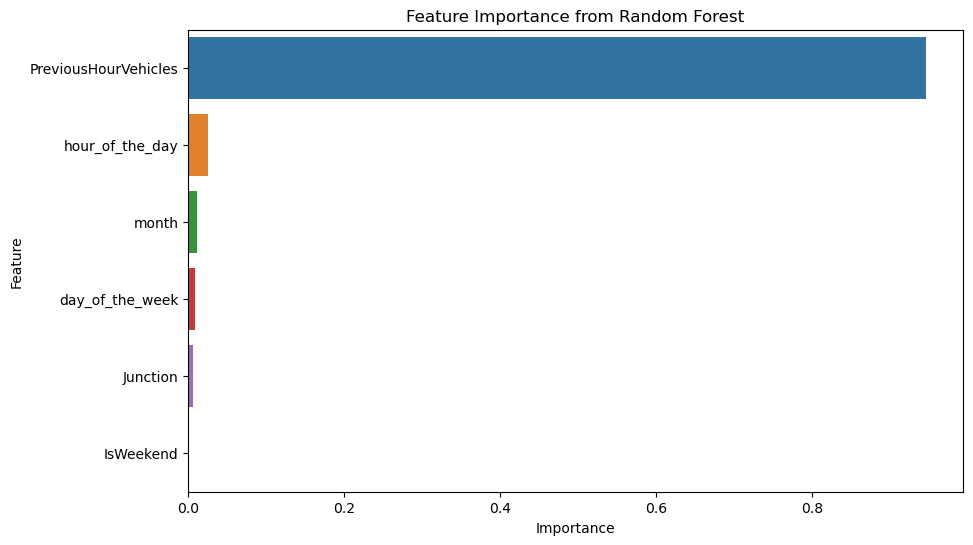

In [160]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [161]:
# Feature Importance from GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X, y)

GradientBoostingRegressor(random_state=42)

In [162]:
gbr_importances = gbr_model.feature_importances_
gbr_importances

array([6.91679744e-03, 1.72819447e-02, 1.40642916e-04, 1.32404300e-04,
       9.75528211e-01, 0.00000000e+00])

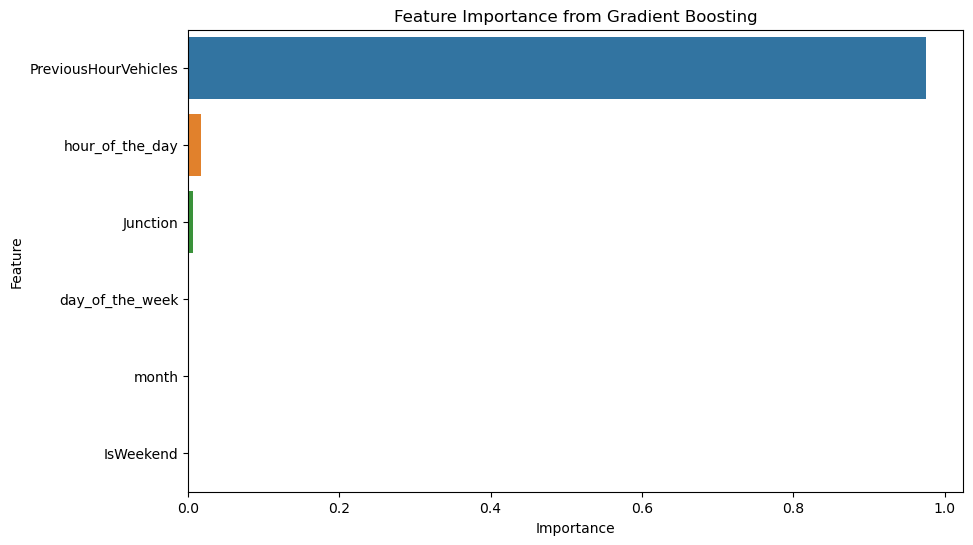

In [163]:
gbr_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gbr_importances})
gbr_feature_importance_df = gbr_feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gbr_feature_importance_df)
plt.title('Feature Importance from Gradient Boosting')
plt.show()


In [164]:
# 2. Select the most influential features for model training to improve efficiency and performance.

top_features = feature_importance_df['Feature'].head(3).tolist()
X_selected = X[top_features]


In [166]:
df_grouped.to_csv('final_df.csv')